In [3]:
#importing libraries
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
#reading csv file
healthcare_dataset = pd.read_csv("D:/Sem 6 - Study Materials/Machine_Learning/SA/Healthcare_Investments_and_Hospital_Stay.csv")
print(healthcare_dataset)

    Location  Time  Hospital_Stay  MRI_Units  CT_Scanners  Hospital_Beds
0        AUS  1992            6.6       1.43        16.71           1.43
1        AUS  1994            6.4       2.36        18.48           2.36
2        AUS  1995            6.5       2.89        20.55           2.89
3        AUS  1996            6.4       2.96        21.95           2.96
4        AUS  1997            6.2       3.53        23.34           3.53
..       ...   ...            ...        ...          ...            ...
513      LTU  2014            6.8      10.57        22.17          10.57
514      LTU  2015            6.6      11.02        21.00          11.02
515      LTU  2016            6.6      12.20        23.01          12.20
516      LTU  2017            6.5      12.37        23.33          12.37
517      LTU  2018            6.5      12.49        24.27          12.49

[518 rows x 6 columns]


In [5]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [6]:
def preprocess_inputs(df):
    df = df.copy()
    
    # One-hot encode Location column
    df = onehot_encode(df, column='Location')
    #print(df)
    # Split df into X and y
    y = df['Hospital_Stay'].copy()
    X = df.drop('Hospital_Stay', axis=1).copy()
    
    #normalizing data values
    #X_new=(X-X.mean())/(X.max()-X.min())
    #X_new.describe()
    
    #splitting into train and test dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)
    
    #Scale X with a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    return X_train, X_test, y_train, y_test


In [7]:
X_train, X_test, y_train, y_test = preprocess_inputs(healthcare_dataset)

In [8]:
trindex=list(X_train.index)
teindex=list(X_test.index)

# converting into array
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)
X_test1=X_test

In [9]:
# printing shape of train set
print("Shape of X_train is: ",X_train.shape) 
print("Shape of Y_train is: ",y_train.shape)
print("Shape of X_test is: ",X_test.shape)
print("Shape of Y_test is: ",y_test.shape)

Shape of X_train is:  (362, 36)
Shape of Y_train is:  (362,)
Shape of X_test is:  (156, 36)
Shape of Y_test is:  (156,)


In [10]:
dummy=(np.ones([362,1],dtype=int))
#concatenating 1's for intercept calculation
X_train=np.concatenate((dummy,X_train),axis=1)
dummy_test=(np.ones([156,1],dtype=int))
X_test=np.concatenate((dummy_test,X_test),axis=1)

In [11]:
print("\n1. Stochastic Gradient Descent")
print("2. Batch Gradient Descent")


1. Stochastic Gradient Descent
2. Batch Gradient Descent


In [20]:
ch=eval(input("\nEnter your choice from above "))
epochs= 550


Enter your choice from above 2


In [21]:
#Mean-Squared-Error loss
def calculate_error(theta):
    error=0
    for i in range(y_train.shape[0]):
        error+=np.square(np.dot(theta.transpose(),X_train[i])-y_train[i])
    mse=error/(2*y_train.shape[0])
    return mse

In [22]:
# coefficients of features
theta=np.random.rand(37,1)

# for storing updated value of theta
temp=np.ndarray([37,1])

# learning rate
alpha=0.04

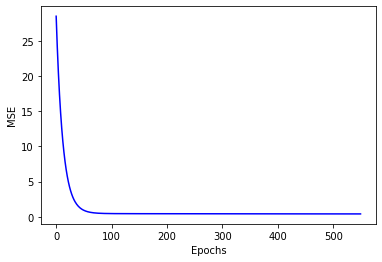

starting value of mean square error is :  [28.49619843]
reduced value of mean square error:  [0.41531718]


In [23]:
#gradient descent calculation
if ch==1:
    y=[]
    for epoch in range(epochs):
        for j in range(37):
            dif=0
            for i in range(y_train.shape[0]):
                dif+=(np.dot(theta.transpose(),X_train[i].reshape([37,1])) - y_train[i])*X_train[i][j]
            temp[j] = theta[j] - (alpha/362)*(dif)
            theta=temp   
        y.append(calculate_error(theta))
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    x=np.arange(0,epochs)
    plt.plot(x,y,color='b')
    plt.show()
if ch==2:
    y=[]
    for epoch in range(epochs):
        for j in range(37):
            dif=0
            for i in range(y_train.shape[0]):
                dif+=(np.dot(theta.transpose(),X_train[i].reshape([37,1])) - y_train[i])*X_train[i][j]
            temp[j] = theta[j] - (alpha/362)*(dif)
        theta=temp
        y.append(calculate_error(theta))
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    x=np.arange(0,epochs)
    plt.plot(x,y,color='b')
    plt.show()
    
print("starting value of mean square error is : ",y[0])
print("reduced value of mean square error: ",y[(len(y)-1)])

In [28]:
#calculation of average percentage error in predicted price for train set
per=[]
for i in range(y_train.shape[0]):
    temp=((np.abs((np.dot(theta.T,X_train[i].reshape(37,1)))-(y_train[i])))/(y_train[i]))*100
    per.append(temp)
avgp=sum(per)/len(per)
print("average percentage error for train set is: {}% ".format(avgp[0][0]))

#calculation of R2 and Root mean square for checking performance of train set on model
lis=[]
for i in range(y_train.shape[0]):
    temp=np.dot(theta.T,X_train[i].reshape(37,1))
    lis.append(temp[0][0])
Y_train_pred=np.array(lis)

r=r2_score(y_train,Y_train_pred)
print("value of R2 for train set is:             ",r)
rmse = (np.sqrt(mean_squared_error(y_train,Y_train_pred)))
print("value of rmse for train set is:           ",rmse)

average percentage error for train set is: 7.081173285397436% 
value of R2 for train set is:              0.8882295885542902
value of rmse for train set is:            0.9113914431046776


In [30]:
#calculation of average percentage error in predicted price for test set
per1=[]
for i in range(y_test.shape[0]):
    temp=((np.abs((np.dot(theta.T,X_test[i].reshape(37,1)))-(y_test[i])))/(y_test[i]))*100
    per1.append(temp)
avgp1=sum(per1)/len(per1)
print("average percentage error for test set is: {}% ".format(avgp1[0][0]))

#calculatiom of R2 and Root mean square error for checking performance of test set on model

lis1=[]
for i in range(y_test.shape[0]):
    temp=np.dot(theta.T,X_test[i].reshape(37,1))
    lis1.append(temp[0][0])
Y_test_pred=np.array(lis1)

r1=r2_score(y_test,Y_test_pred)
print("value of R2 for test set is:             ",r1)
rmse = (np.sqrt(mean_squared_error(y_test,Y_test_pred)))
print("value of rmse for test set is:           ",rmse)

average percentage error for test set is: 8.066320656981638% 
value of R2 for test set is:              0.8705849305713449
value of rmse for test set is:            0.770699231622185


In [18]:
# Predicting values
temp=X_test1[0:50]
df1=pd.DataFrame(temp, columns=['Time','MRI_Units','CT_Scanners','Hospital_Beds','AUS','AUT','BEL','CAN','CZE','DEU','DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'NLD', 'NZL', 'POL', 'PRT', 'RUS', 'SVK', 'SVN', 'TUR', 'USA'])
print("Below data is in NORMALIZED FORM")
print(df1)

Below data is in NORMALIZED FORM
        Time  MRI_Units  CT_Scanners  Hospital_Beds       AUS       AUT  \
0  -0.158632  -0.591434    -0.647429      -0.591434 -0.207913 -0.207913   
1   0.856451  -0.465273    -0.295665      -0.465273 -0.207913 -0.207913   
2  -2.623831  -1.110724    -0.848152      -1.110724 -0.207913 -0.207913   
3   0.566427  -0.101433    -0.179073      -0.101433 -0.207913 -0.207913   
4  -0.883690   0.763674     0.461520       0.763674 -0.207913 -0.207913   
5  -1.318726   0.277052     0.331017       0.277052 -0.207913 -0.207913   
6   0.131392   0.870686     0.613885       0.870686 -0.207913  4.809712   
7  -1.463737  -0.700699     0.270733      -0.700699  4.809712 -0.207913   
8  -2.333808  -1.176057    -1.126383      -1.176057 -0.207913 -0.207913   
9  -1.608749   0.076545     0.265434       0.076545 -0.207913 -0.207913   
10  0.566427  -0.500193    -0.302290      -0.500193 -0.207913 -0.207913   
11  0.711439   0.242132     0.131618       0.242132 -0.207913 -0.20

In [29]:
ind=int(input("\nEnter the index no from above data for which you want to predict LOS: "))
LOS=np.dot(theta.transpose(),X_test[ind].reshape(37,1))

print("\nPREDICTED LENGTH OF STAY IS: ",LOS[0])
print("ORIGINAL LENGTH OF STAY IS : ",y_test[ind])


Enter the index no from above data for which you want to predict LOS: 14

PREDICTED LENGTH OF STAY IS:  [9.03370019]
ORIGINAL LENGTH OF STAY IS :  10.1
